In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
stats_Corr = pd.read_csv("corr_survey_stat_bias_metrics.csv")

In [9]:
#stats_Corr.rename(columns={"Our_metric",""})

In [10]:
stats_Corr.columns

Index(['survey', 'WE', 'WEAT', 'RNSB', 'RND', 'ECT', 'Our_metric'], dtype='object')

In [11]:
RAD_stat = stats_Corr[stats_Corr["survey"] == "RAD"]
COX_stat = stats_Corr[stats_Corr["survey"] == "COX"]
OEOH_US_stat = stats_Corr[stats_Corr["survey"] == "OEOH-US"]
OEOH_UK_stat = stats_Corr[stats_Corr["survey"] == "OEOH-UK"]
OEOH_fin_stat = stats_Corr[stats_Corr["survey"] == "OEOH-Fin"]
OEOH_GR_stat = stats_Corr[stats_Corr["survey"] == "OEOH-GR"]

In [12]:
RAD_stat["WEAT_ranked"] = scipy.stats.rankdata([RAD_stat["WEAT"]])
RAD_stat["RNSB_ranked"] = scipy.stats.rankdata([RAD_stat["RNSB"]])
RAD_stat["RND_ranked"] = scipy.stats.rankdata([RAD_stat["RND"]])
RAD_stat["ECT_ranked"] = scipy.stats.rankdata([RAD_stat["ECT"]])
RAD_stat["OUR_metric_ranked"] = scipy.stats.rankdata([RAD_stat["Our_metric"]])

<ipython-input-12-20c3ba7b1c26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RAD_stat["WEAT_ranked"] = scipy.stats.rankdata([RAD_stat["WEAT"]])
<ipython-input-12-20c3ba7b1c26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RAD_stat["RNSB_ranked"] = scipy.stats.rankdata([RAD_stat["RNSB"]])
<ipython-input-12-20c3ba7b1c26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [13]:
RAD_stat.index = RAD_stat.WE
COX_stat.index = COX_stat.WE
OEOH_US_stat.index = OEOH_US_stat.WE
OEOH_UK_stat.index = OEOH_UK_stat.WE
OEOH_fin_stat.index = OEOH_fin_stat.WE
OEOH_GR_stat.index = OEOH_GR_stat.WE

In [14]:
RAD_stat

,survey,WE,WEAT,RNSB,RND,ECT,Our_metric,WEAT_ranked,RNSB_ranked,RND_ranked,ECT_ranked,OUR_metric_ranked
WE,,,,,,,,,,,,
w2v,RAD,w2v,-0.88,-0.73,-0.39,-0.11,-0.96,1.0,2.0,1.0,5.0,1.0
Glove-wk,RAD,Glove-wk,-0.57,-0.89,0.24,-0.29,0.15,3.0,1.0,4.0,3.0,2.0
Glove-Twitter,RAD,Glove-Twitter,-0.46,0.55,0.05,-0.20,0.90,4.0,4.0,3.0,4.0,4.0
UD,RAD,UD,-0.21,-0.41,-0.34,-0.98,0.84,5.0,3.0,2.0,1.0,3.0
Chan,RAD,Chan,-0.84,0.77,0.25,-0.74,0.98,2.0,5.0,5.0,2.0,5.0


In [22]:
columns = ['WEAT_ranked', 'RNSB_ranked', 'RND_ranked', 'ECT_ranked', 'OUR_metric_ranked']
rows = ["w2v", "glove-wk", "glove-twtr", 'ud', 'chan']
x_labels = ['WEAT', 'RNSB', 'RND', 'ECT', 'OM']

KeyError: "None of [Index(['WEAT_ranked', 'RNSB_ranked', 'RND_ranked', 'ECT_ranked',\n       'OUR_metric_ranked'],\n      dtype='object')] are in the [columns]"

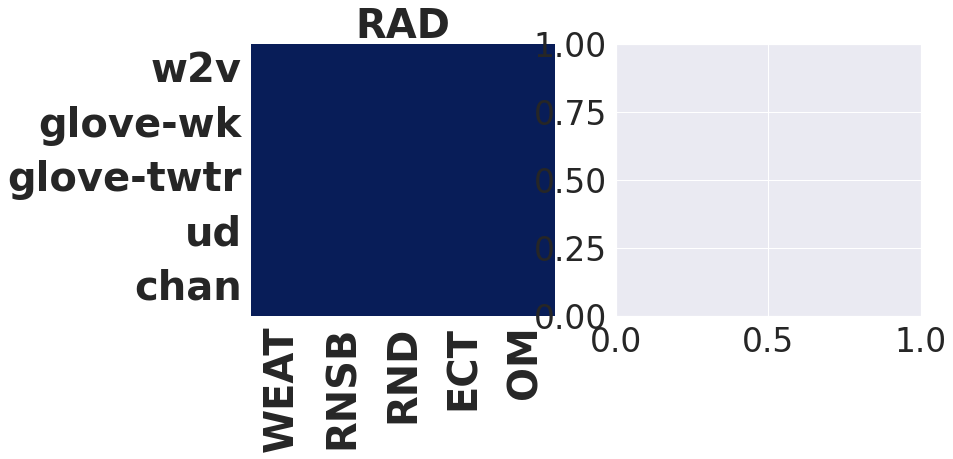

In [23]:
sns.set(font_scale=3)

fig2 = plt.figure(figsize = (12,5)) # width x height
ax1 = fig2.add_subplot(1, 2, 1) # row, column, position
#ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig2.add_subplot(1, 2, 2)
#ax4 = fig.add_subplot(2, 3, 4)
#ax5 = fig.add_subplot(1, 6, 5)
#ax6 = fig.add_subplot(1, 6, 6)

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=RAD_stat[columns], ax=ax1, vmin=-1, vmax=1,cbar=False, cmap="YlGnBu")
ax1.set_title('RAD', fontweight="bold", fontsize=40)
ax1.set_ylabel("")
ax1.set_xticklabels(x_labels, fontweight="bold", rotation=90, fontsize=40)
ax1.set_yticklabels(rows, fontweight="bold", fontsize=40)

#sns.heatmap(data=COX_stat[columns], ax=ax2, vmin=-1, vmax=1,cbar=False, yticklabels=False,cmap="YlGnBu")
#ax2.set_title('COX', fontweight="bold", fontsize=40)
#ax2.set_ylabel("")
#ax2.set_xticklabels(columns, fontweight="bold", rotation=90, fontsize=40)

sns.heatmap(data=OEOH_fin_stat[columns], ax=ax3, vmin=-1, vmax=1,cbar=True, yticklabels=False,cmap="YlGnBu")
ax3.set_title('OEOH-US', fontweight="bold", fontsize=40)
ax3.set_ylabel("")
ax3.set_xticklabels(x_labels, fontweight="bold", rotation=90, fontsize=40)

#sns.heatmap(data=OEOH_fin_stat[columns], ax=ax4, vmin=-1, vmax=1,cbar=True, yticklabels=False,cbar_kws={'label': 'correlation'},cmap="YlGnBu")
#ax4.set_title('OEOH-UK', fontweight="bold", fontsize=35)
#ax4.set_ylabel("")
#ax4.set_xticklabels(columns, fontweight="bold", rotation=90, fontsize=35)

#sns.heatmap(data=OEOH_GR_stat[columns], ax=ax5, vmin=-1, vmax=1,cbar=False, yticklabels=False,cmap="YlGnBu")
#ax5.set_title('OEOH-Germany', fontweight="bold", fontsize=35)
#ax5.set_ylabel("")
#ax5.set_xticklabels(columns, fontweight="bold", rotation=45, fontsize=35)

#sns.heatmap(data=OEOH_fin_stat[columns], ax=ax5, vmin=-1, vmax=1,cbar=True, yticklabels=False,cbar_kws={'label': 'correlation'},cmap="YlGnBu")
#ax5.set_title('OEOH-FI', fontweight="bold", fontsize=35)
#ax5.set_ylabel("")
#ax5.set_xticklabels(columns, fontweight="bold", fontsize=35, rotation=90)


In [26]:
fig2.savefig("heat_map_sos_metrics_corr_without_cox.pdf",bbox_inches='tight')